<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/NFLMatchups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
# Install the library for NFL Data
!pip install nfl_data_py
import nfl_data_py as nfl

# Imports
from math import pi
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from math import pi

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [284]:
stats = nfl.import_pbp_data([2023])
stats['def_epa'] = -stats['epa']

2023 done.
Downcasting floats.


<ipython-input-284-9b98d0d57315>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stats['def_epa'] = -stats['epa']


In [285]:
pd.set_option('display.max_columns', None)
stats.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [286]:
passing = stats[stats["play_type"] == "pass"]
rushing = stats[stats["play_type"] == "run"]

# OFFENSE
passing_total = passing.groupby("posteam").size().reset_index(name = "pass_plays")
off_passing = passing.groupby("posteam")["epa"].sum().reset_index()

off_passing["off_passing_epa"] = off_passing["epa"] / passing_total["pass_plays"]

rushing_total = rushing.groupby("posteam").size().reset_index(name = "run_plays")
off_rushing = rushing.groupby("posteam")["epa"].sum().reset_index()

off_rushing["off_rush_epa"] = off_rushing["epa"] / rushing_total["run_plays"]


off_passing["off_passing_rank"] = off_passing["off_passing_epa"].rank(method="max", ascending=True).astype(int)
off_passing = off_passing.sort_values("off_passing_rank", ascending=False).reset_index(drop = True)

off_rushing["off_rushing_rank"] = off_rushing["off_rush_epa"].rank(method="max", ascending=True).astype(int)
off_rushing = off_rushing.sort_values("off_rushing_rank", ascending=False).reset_index(drop = True)

off_passing = off_passing.rename(columns={"posteam": "team"})
off_rushing = off_rushing.rename(columns={"posteam": "team"})

In [287]:
# DEFENSE
passing_total = passing.groupby("defteam").size().reset_index(name = "pass_plays")
def_passing = passing.groupby("defteam")["def_epa"].sum().reset_index()

def_passing["def_passing_epa"] = def_passing["def_epa"] / passing_total["pass_plays"]

rushing_total = rushing.groupby("defteam").size().reset_index(name = "run_plays")
def_rushing = rushing.groupby("defteam")["def_epa"].sum().reset_index()

def_rushing["def_rush_epa"] = def_rushing["def_epa"] / rushing_total["run_plays"]

def_passing["def_passing_rank"] = def_passing["def_passing_epa"].rank(method="max", ascending=True).astype(int)
def_passing = def_passing.sort_values("def_passing_rank", ascending=False).reset_index(drop = True)

def_rushing["def_rushing_rank"] = def_rushing["def_rush_epa"].rank(method="max", ascending=True).astype(int)
def_rushing = def_rushing.sort_values("def_rushing_rank", ascending=False).reset_index(drop = True)

def_passing = def_passing.rename(columns={"defteam": "team"})
def_rushing = def_rushing.rename(columns={"defteam": "team"})

In [288]:
#TURNOVERS
off_fumble = stats.groupby("posteam")["fumble_lost"].sum().reset_index()
off_int = stats.groupby("posteam")["interception"].sum().reset_index()

def_fumble = stats.groupby("defteam")["fumble_lost"].sum().reset_index()
def_int = stats.groupby("defteam")["interception"].sum().reset_index()

turnovers = pd.DataFrame(off_fumble["posteam"])
turnovers["turnover_diff"] = (def_fumble["fumble_lost"] + def_int["interception"]) - (off_fumble["fumble_lost"] + off_int["interception"])

turnovers["turnover_rank"] = turnovers["turnover_diff"].rank(method="max", ascending=True).astype(int)
turnovers = turnovers.sort_values("turnover_rank", ascending=False).reset_index(drop = True)

turnovers = turnovers.rename(columns={"posteam": "team"})

In [289]:
tot_ranks = [off_passing, off_rushing, def_passing, def_rushing, turnovers]

tot_ranks = [off_rushing, def_passing, def_rushing, turnovers]

merged_df = off_passing
data_frames = [off_rushing, def_passing, def_rushing, turnovers]

for df in data_frames:
    merged_df = pd.merge(merged_df, df, on='team', how='left')

fin_ranks = merged_df[["team", "off_passing_rank", "off_rushing_rank", "def_passing_rank", "def_rushing_rank", "turnover_rank"]]
fin_ranks.head()

,team,off_passing_rank,off_rushing_rank,def_passing_rank,def_rushing_rank,turnover_rank
0,SF,32,22,28,14,32
1,MIA,31,32,15,12,12
2,BUF,30,30,27,9,29
3,LAC,29,19,8,15,27
4,TB,28,5,25,23,32


First Team Abbreviation: CIN
Second Team Abbreviation: KC


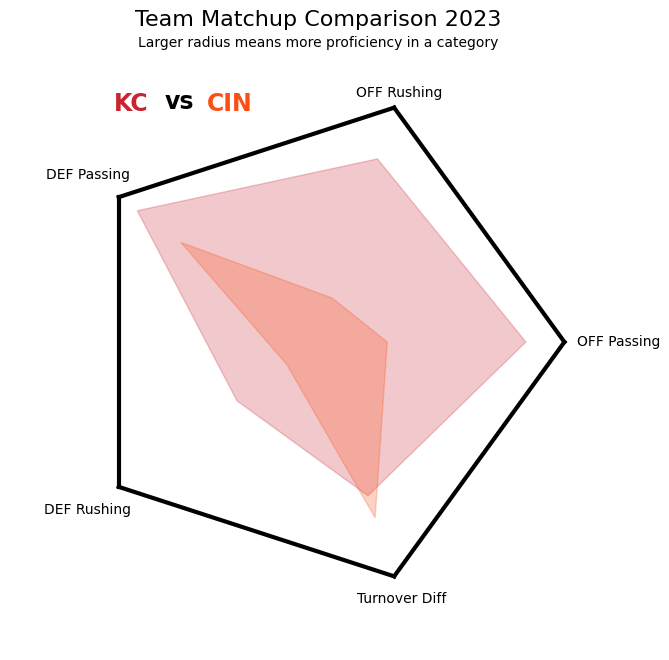

In [291]:
def matchup(inp1, inp2):
  matchup = fin_ranks[fin_ranks["team"].isin([inp1, inp2])]

  teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
            'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
            'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
            'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
            'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
            'TEN':'#4095D1','WAS':'#FFC20F'}

  tm_colors = [teamcolor.get(team) for team in matchup["team"]]

  data = matchup.loc[:, categories].values

  first_column = data[:, 0]

  # Append the first column to the end
  data = np.hstack((data, first_column.reshape(-1, 1)))

  category_count = len(list(single.columns[1:]))

  labels = ['OFF Passing', 'OFF Rushing', 'DEF Passing', 'DEF Rushing', 'Turnover Diff']

  # Create a list of angles for each category
  angles = [n / float(category_count) * 2 * np.pi for n in range(category_count)]
  angles += angles[:1]


  # Make the plot
  fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))


  # Plot the data
  for i in range(len(data)):
    ax.fill(angles, data[i], color=tm_colors[i], alpha=0.25)

  # Add a main title
  ax.set_title('Team Matchup Comparison 2023', fontsize=16)

  # Add a subtitle
  subtitle = 'Larger radius means more proficiency in a category'
  plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

  # Add labels
  ax.text(angles[0], 39, labels[0], ha='center', va='center')
  ax.text(angles[1], 34, labels[1], ha='center', va='center')
  ax.text(angles[2], 37, labels[2], ha='center', va='center')
  ax.text(angles[3], 37, labels[3], ha='center', va='center')
  ax.text(angles[4], 35, labels[4], ha='center', va='center')

  # Matchup
  color1 = teamcolor.get(inp1)
  color2 = teamcolor.get(inp2)

  x = 2 * np.pi / 3
  y = 36

  ax.text(x - .17, y - 3, inp1, ha='center', va='center', fontsize=17, weight='bold', color=color1)
  ax.text(x + 0.14, y + 3.3, inp2, ha='center', va='center', fontsize=17, weight='bold', color=color2)
  ax.text(x, y, "vs", ha='center', va='center', fontsize=17, weight='bold', color="k")


  pentagon_coords = [
      (0, 32),
      (2 * np.pi / 5, 32),
      (4 * np.pi / 5, 32),
      (6 * np.pi / 5, 32),
      (8 * np.pi / 5, 32),
  ]

  # Add lines connecting the vertices of the pentagon
  for i in range(len(pentagon_coords) - 1):
      x1, y1 = pentagon_coords[i]
      x2, y2 = pentagon_coords[i + 1]
      ax.plot([x1, x2], [y1, y2], color='k', linewidth=3)

  # Connect the last point to the first point
  x1, y1 = pentagon_coords[-1]
  x2, y2 = pentagon_coords[0]
  ax.plot([x1, x2], [y1, y2], color='k', linewidth=3)

  ax.yaxis.grid(True, linestyle='-', alpha=0.0, color='none')
  ax.xaxis.grid(True, linestyle='-', alpha=0.0, color='none')

  ax.spines['polar'].set_visible(False)

  plt.ylim(0, 40)
  ax.set_yticks(np.arange(0, 40, 2))

  ax.set_yticklabels([])
  ax.set_xticklabels([])

  # Show the plot
  plt.show()

inp1 = input("First Team Abbreviation: ")
inp2 = input("Second Team Abbreviation: ")

matchup(inp1, inp2)